In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [41]:
salary_df = pd.read_csv('salary.csv')
#salary_meta = pd.read_csv('salary metadata.csv')

# DATA WRANGLING

In [42]:
salary_df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


In [43]:
salary_df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [44]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [45]:
salary_df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [46]:
salary_df = salary_df.dropna(axis=0, subset=['salary'])

In [47]:
salary_df.isnull().any()

salary         False
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
dtype: bool

In [48]:
salary_df.corr('pearson')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


#### Examine the training data for missing and extreme values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#from sklearn.linear_model import LogisticRegression

In [51]:
# fit a model
#lm = linear_model.LinearRegression()

In [52]:
X = salary_df["yearsworked"]  
y = salary_df["salary"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [54]:
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(410,) (103,)
(410,) (103,)


In [55]:
import statsmodels.api as sm

In [56]:
## Without a constant

import statsmodels.api as sm

X = salary_df["yearsworked"]
y = salary_df["salary"]

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              1262.
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                   4.68e-127
Time:                        12:21:59   Log-Likelihood:                         -4746.8
No. Observations:                 410   AIC:                                      9496.
Df Residuals:                     409   BIC:                                      9500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2869.0391     80.771     35.521      0.000    2710.260    3027.818
==============================================================================
Omnibus:                        9.070   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.180
Skew:                          -0.037   Prob(JB):                       0.0750
Kurtosis:                       2.454   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
(model.rsquared*100).round()

76.0

In [58]:
import statsmodels.api as sm # import statsmodels 

x_train = sm.add_constant(X_train.values)
model_cons = sm.OLS(y_train, x_train).fit()
predictions_cons = model.predict() # make the predictions by the model


#print (results.rsquared)
#predictions_cons.summary()

In [59]:
(model_cons.rsquared*100).round()

38.0

In [60]:
X_train.isnull().values.any()

False

In [61]:
y_train.isnull().values.any()

False

In [62]:
y_test.isnull().values.any()

False

In [63]:
X_train.isnull().values.any()

False

Text(0.5, 1.0, 'Examine the training data for extreme values')

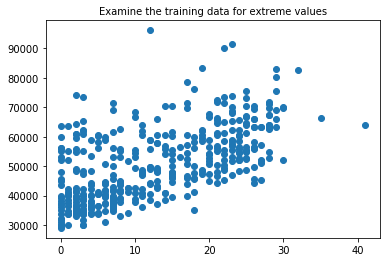

In [64]:
plt.scatter(X_train, y_train)
plt.title('Examine the training data for extreme values',fontsize=10)

# EDA

#### Create histograms to show the distribution of the variables 

In [ ]:
g = sns.pairplot(salary_df, kind='reg')

Used pairs plots to quickly explore distributions and relationships in the dataset. 

In [ ]:
g = plt.subplots(figsize=(18, 8))
g = sns.heatmap(salary_df.corr(),yticklabels=True,annot=True)

In [ ]:
#gx = sns.distplot(salary_df)

#### Create scatterplot showing the relationship between Years Worked and Salary

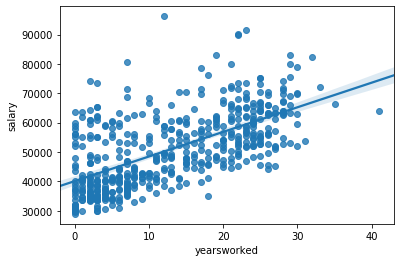

In [29]:
ax = sns.regplot(x=salary_df['yearsworked'], y=salary_df['salary'], ci=95, truncate=False)

Using a 95% confidence interval

# MODELING SUMM

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              1262.
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                   4.68e-127
Time:                        12:20:36   Log-Likelihood:                         -4746.8
No. Observations:                 410   AIC:                                      9496.
Df Residuals:                     409   BIC:                                      9500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2869.0391     80.771     35.521      0.000    2710.260    3027.818
==============================================================================
Omnibus:                        9.070   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.180
Skew:                          -0.037   Prob(JB):                       0.0750
Kurtosis:                       2.454   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.

### 2.1 Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

In [31]:
from scipy.stats import stats
stats.pearsonr(salary_df.yearsworked, salary_df.salary)

(0.6235888657598048, 1.2873351342916404e-56)

In [32]:
(model.rsquared*100).round()

76.0

There is 76% variance meaning the model better fits my data and if we were to plot the variance the data points will fall closer to the fitted regression line 
There's 62% correlation between yearsworked and salary with their p-value being 1.28 making it highly significant

### 2.2 What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

62%

### 3. What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?



In [36]:
model.params

yearsworked    2869.039126
dtype: float64

### 5. Calculate the expected salary for someone with 12 years’ work experience

In [37]:
model.predict(12)

array([34428.46950975])

someone with 12 years’ work experience will earn 34428.46 dollars

### 6. Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [39]:
model.predict(80).round(2)

array([229523.13])

someone with 80 years’ work experience will earn 229523.13 dollars

### 7. We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

yearsworked, yearsrank, position

### 8. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
from sklearn import metrics
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_predict)))
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model1.predict(x_train))))

Slight evidence of overfitting